# Classificação de vinhos baseado em suas características (Multiclass classification of wine based on its features)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Conhecendo os dados (getting to know the data)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/classificacao_multiclasse/main/Dados/df_vinho.csv')

In [3]:
df.head()

,acidez fixa,acidez volátil,ácido cítrico,açúcar residual,cloretos,dióxido de enxofre livre,dióxido de enxofre total,densidade,pH,sulfatos,álcool,qualidade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,mediano
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,mediano
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,mediano
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,mediano
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,mediano


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   acidez fixa                1359 non-null   float64
 1   acidez volátil             1359 non-null   float64
 2   ácido cítrico              1359 non-null   float64
 3   açúcar residual            1359 non-null   float64
 4   cloretos                   1359 non-null   float64
 5   dióxido de enxofre livre   1359 non-null   float64
 6   dióxido de enxofre total   1359 non-null   float64
 7   densidade                  1359 non-null   float64
 8   pH                         1359 non-null   float64
 9   sulfatos                   1359 non-null   float64
 10  álcool                     1359 non-null   float64
 11  qualidade                  1359 non-null   object 
dtypes: float64(11), object(1)
memory usage: 127.5+ KB


[PT-BR] O objetivo é gerar e avaliar um modelo capaz de prever a qualidade dos vinhos. Variável X (explicativa/independente) está representada pelas características químicas, já a variável y (explicada/resposta) é categórica e é resultado da avaliação de um painel de especialistas.

[EN] The objective is to produce and evaluate a model to predict the quality of wine. Variable X (explanatory/independant) is represented by the chemical characteristics and the variable y (explained/response) is categorical and based on a classification proposed by a board os specialists.

In [5]:
df['qualidade'].value_counts()

mediano    1112
bom         184
ruim         63
Name: qualidade, dtype: int64

<Axes: xlabel='qualidade', ylabel='count'>

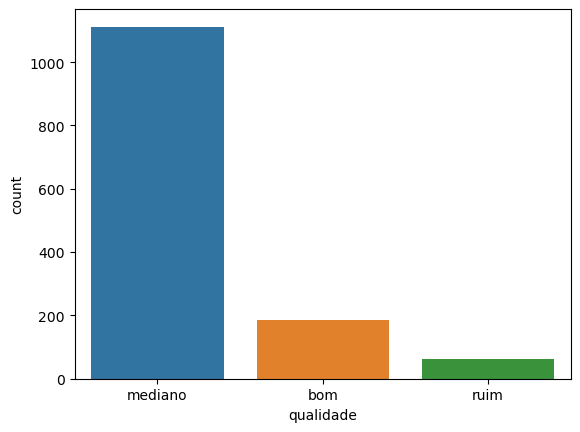

In [6]:
sns.countplot(df, x='qualidade')

### Treinamento do modelo (Model training)

In [7]:
X = df.drop('qualidade', axis =1)
y = df['qualidade']

Dividindo os dados (Splitting the data):
* Teste (test) = 15% total
* Treino (train) = 63,75 % total
* Validação (validation) = 21,25% total

In [8]:
from sklearn.model_selection import train_test_split

X, X_teste, y, y_teste = train_test_split(X,y, test_size = 0.15, stratify=y)
X_treino, X_val, y_treino, y_val = train_test_split(X,y, stratify=y)

In [9]:
#Random Forest, depth = 10
from sklearn.ensemble import RandomForestClassifier

In [10]:
modelo_rf = RandomForestClassifier(max_depth=10)
modelo_rf.fit(X_treino, y_treino)
y_pred_rf = modelo_rf.predict(X_val)

In [11]:
#generate a model
def gen_modelo (nome_modelo, tipo_modelo, X_treino, y_treino, X_teste, **params):
    nome_modelo = tipo_modelo(**params)
    nome_modelo.fit(X_treino, y_treino)
    y_pred = nome_modelo.predict(X_teste)
    return [nome_modelo, y_pred, tipo_modelo, params]

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [13]:
#create a classification report and confusion matrix normalized. 'modelo' is the list returned in the training of a model
def report (modelo, X_validacao, y_validacao): 
    print(f'Modelo {modelo[2:]}:\n{classification_report(y_validacao, modelo[1])}')
    ConfusionMatrixDisplay.from_estimator(modelo[0], X_validacao, y_validacao, normalize = 'true', display_labels=modelo[0].classes_, cmap= 'Blues')

C:\Users\T-Gamer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\T-Gamer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\T-Gamer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modelo [<class 'sklearn.ensemble._forest.RandomForestClassifier'>, {'max_depth': 10, 'random_state': 44}]:
              precision    recall  f1-score   support

         bom       0.72      0.33      0.46        39
     mediano       0.85      0.98      0.91       236
        ruim       0.00      0.00      0.00        14

    accuracy                           0.84       289
   macro avg       0.52      0.44      0.46       289
weighted avg       0.79      0.84      0.81       289



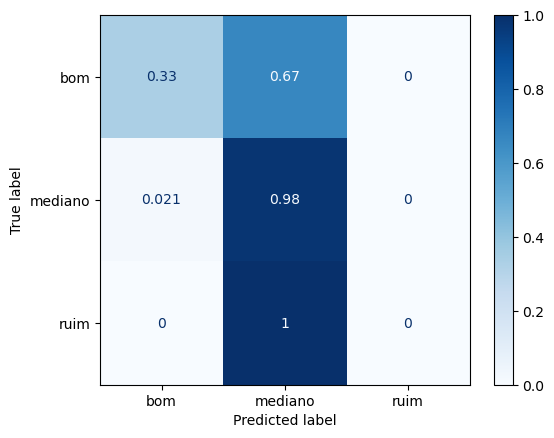

In [14]:
report(gen_modelo('modelo_rf', RandomForestClassifier, X_treino, y_treino, X_val, max_depth=10, random_state = 44), X_val, y_val);

* Baixo desempenho - desbalanceamento dos dados
* Low performance - imbalanced data

#### Balanceamento (balancing)

Modelo [<class 'sklearn.ensemble._forest.RandomForestClassifier'>, {'max_depth': 10, 'random_state': 44}]:
              precision    recall  f1-score   support

         bom       0.44      0.62      0.52        39
     mediano       0.89      0.81      0.85       236
        ruim       0.24      0.36      0.29        14

    accuracy                           0.76       289
   macro avg       0.53      0.59      0.55       289
weighted avg       0.80      0.76      0.78       289



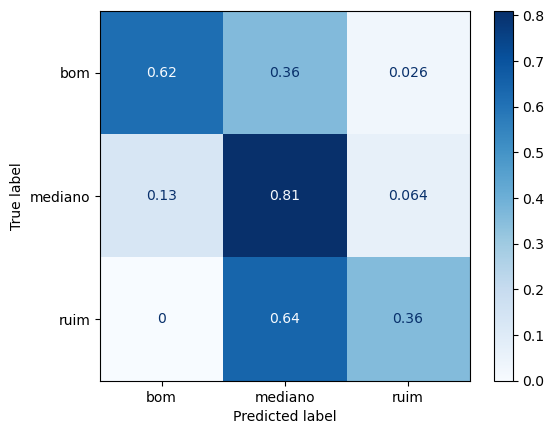

In [15]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_over, y_over = oversample.fit_resample(X_treino, y_treino)

report(gen_modelo('modelo_rf_oversampled', RandomForestClassifier, X_over, y_over, X_val, max_depth = 10, random_state=44)
       , X_val, y_val)

Modelo [<class 'sklearn.ensemble._forest.RandomForestClassifier'>, {'max_depth': 5, 'random_state': 44}]:
              precision    recall  f1-score   support

         bom       0.40      0.64      0.49        39
     mediano       0.83      0.13      0.22       236
        ruim       0.05      0.64      0.09        14

    accuracy                           0.22       289
   macro avg       0.43      0.47      0.27       289
weighted avg       0.74      0.22      0.25       289



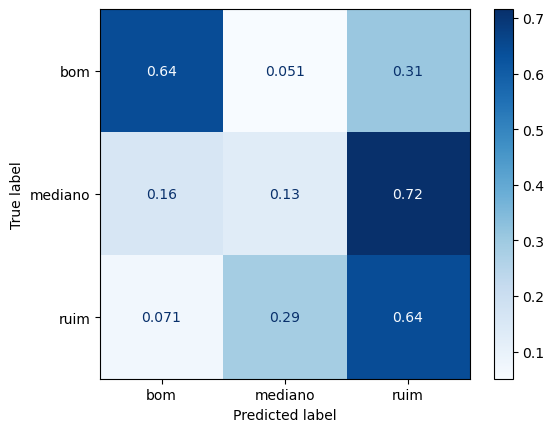

In [16]:
from imblearn.under_sampling import NearMiss

undersample = NearMiss()
X_under, y_under = undersample.fit_resample(X_treino, y_treino)

report(gen_modelo('modelo_rf_undersampled', RandomForestClassifier, X_under, y_under, X_val, max_depth = 5, random_state = 44),
       X_val, y_val)

O melhor modelo até agora usa o método Random Forest com o oversample (SMOTE) 

The best model so far uses the Random Forest method oversampled (SMOTE)


#### Treinando outros método

Modelo [<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>, {'random_state': 44}]:
              precision    recall  f1-score   support

         bom       0.40      0.59      0.48        39
     mediano       0.89      0.81      0.84       236
        ruim       0.22      0.29      0.25        14

    accuracy                           0.75       289
   macro avg       0.50      0.56      0.52       289
weighted avg       0.79      0.75      0.77       289



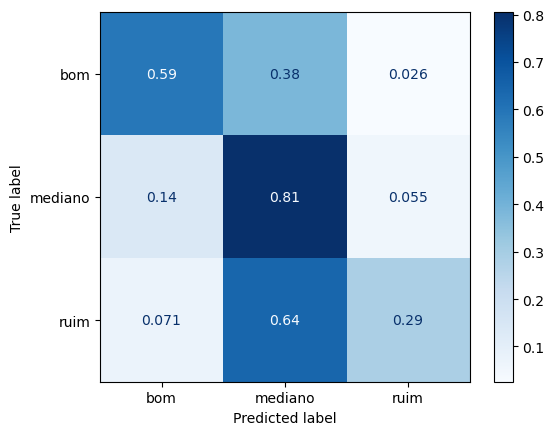

In [17]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
report(gen_modelo('modelo_gb_oversampled', GradientBoostingClassifier, X_over, y_over, X_val, random_state=44)
       , X_val, y_val)

Modelo [<class 'sklearn.neighbors._classification.KNeighborsClassifier'>, {'algorithm': 'kd_tree'}]:
              precision    recall  f1-score   support

         bom       0.30      0.64      0.41        39
     mediano       0.89      0.55      0.68       236
        ruim       0.05      0.21      0.08        14

    accuracy                           0.54       289
   macro avg       0.41      0.47      0.39       289
weighted avg       0.77      0.54      0.61       289



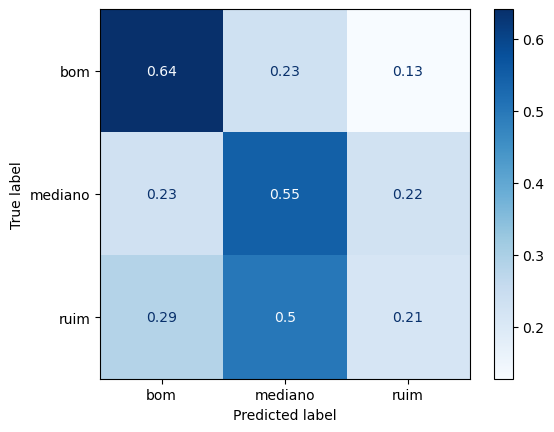

In [18]:
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
report(gen_modelo('modelo_kn_oversampled', KNeighborsClassifier, X_over, y_over, X_val, algorithm = 'kd_tree')
       , X_val, y_val)

Mesmo testando outros métodos, a Random Forest parece ser a melhor

Even using other methods the Random Forest looks like the best one

### Pipeline

In [19]:
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import cross_validate, StratifiedKFold

#max_depth=5
modelo = RandomForestClassifier(max_depth=5)
pipeline = imbpipeline([('oversample', SMOTE()), ('rf', modelo)])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, X,y, cv=skf, scoring = 'recall_weighted')
cv_resultados['test_score']

array([0.72294372, 0.67099567, 0.7012987 , 0.68398268, 0.64935065])

In [20]:
#max_depth=10
modelo = RandomForestClassifier(max_depth=10)
pipeline = imbpipeline([('oversample', SMOTE()), ('rf', modelo)])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, X,y, cv=skf, scoring = 'recall_weighted')
cv_resultados['test_score']

array([0.77489177, 0.74891775, 0.73593074, 0.75324675, 0.74458874])

* Intervalo de confiança (Confidence Int)

In [21]:
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()
print(f'Intervalo de Confiança:[{media - 2*desvio_padrao},{min(media + 2*desvio_padrao, 1)}]')

Intervalo de Confiança:[0.7254834694746789,0.777546833555624]


## Modelo Final

Modelo [<class 'sklearn.ensemble._forest.RandomForestClassifier'>, {'max_depth': 10, 'random_state': 0}]:
              precision    recall  f1-score   support

         bom       0.38      0.54      0.44        28
     mediano       0.89      0.76      0.82       167
        ruim       0.32      0.78      0.45         9

    accuracy                           0.73       204
   macro avg       0.53      0.69      0.57       204
weighted avg       0.80      0.73      0.75       204



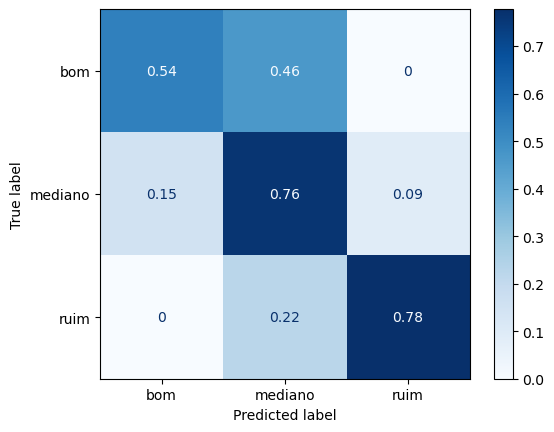

In [22]:
oversample = SMOTE()
X_balanceado, y_balanceado = oversample.fit_resample(X, y)

report(gen_modelo('modelo_final', RandomForestClassifier, X_balanceado, y_balanceado, X_teste, max_depth=10, random_state=0),
       X_teste, y_teste)
       

              precision    recall  f1-score   support

         bom       0.40      0.61      0.48        28
     mediano       0.90      0.76      0.82       167
        ruim       0.30      0.67      0.41         9

    accuracy                           0.74       204
   macro avg       0.53      0.68      0.57       204
weighted avg       0.80      0.74      0.76       204



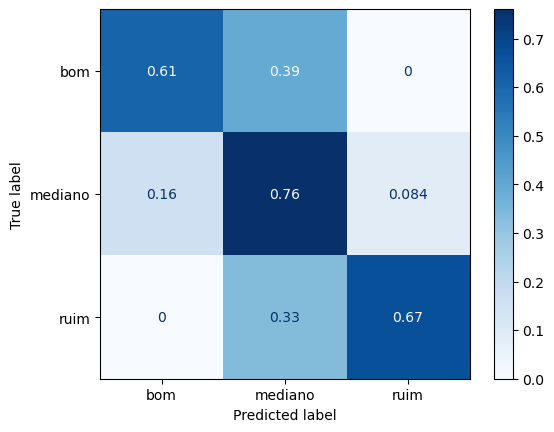

In [23]:
oversample = SMOTE(random_state=0)
X_balanceado, y_balanceado = oversample.fit_resample(X, y)
modelo = RandomForestClassifier(random_state=0, max_depth=10)
modelo.fit(X_balanceado, y_balanceado)
y_pred = modelo.predict(X_teste)

print(classification_report(y_teste, y_pred))
ConfusionMatrixDisplay.from_predictions(y_teste, y_pred, normalize='true', cmap='Blues');


RandomForestClassifier(max_depth=10, random_state=0)